# Sommaire

- [Volet n°1 : Présentation des indicateurs](#volet-n1--présentation-des-indicateurs)
- [1.Importation des modules essentiels](#importation-des-modules-essentiels)
  - [Correction des données manquantes à partir de la méthode du mode pour les variables qualitatives.](#correction-des-données-manquantes-à-partir-de-la-méthode-du-mode-pour-les-variables-qualitatives)
- [(b) Construire dans la base de données une colonne Moyenne pour calculer la moyenne de chaque candidat en fonction des notes obtenues.](#construire-dans-la-base-de-données-une-colonne-moyenne-pour-calculer-la-moyenne-de-chaque-candidat-en-fonction-des-notes-obtenues)
- [(c) Construire une colonne Rang pour classer les candidats par ordre décroissant des performances (1er, 2e …).](#c-construire-une-colonne-rang-pour-classer-les-candidats-par-ordre-décroissant-des-performances-1er-2e-)
- [(d) Construire une colonne Décision du jury qui permet de dire si l’élève est admis ou échoué.](#d-construire-une-colonne-décision-du-jury-qui-permet-de-dire-si-lélève-est-admis-ou-échoué)
- [(e) Créer un data frame BAC_Admis ne contenant que les candidats admis.](#e-créer-un-data-frame-bac_admis-ne-contenant-que-les-candidats-admis)
- [(f) Construire une colonne Mention qui permet de calculer les mentions des élèves admis](#f-construire-une-colonne-mention-qui-permet-de-calculer-les-mentions-des-élèves-admis)
- [1. Statistiques sociodémographiques](#1-statistiques-sociodémographiques)
- [1.2. Pourcentage des candidats par département : Pourcentage des candidats inscrits par département.](#12-pourcentage-des-candidats-par-département--pourcentage-des-candidats-inscrits-par-département)
- [1.3. Pourcentage par type d’établissement : Il s’agit ici de présenter le pourcentage des candidats en fonction de l’établissement fréquenté (Privé, Publique ou Candidat libre).](#13-pourcentage-par-type-détablissement--il-sagit-ici-de-présenter-le-pourcentage-des-candidats-en-fonction-de-létablissement-fréquenté-privé-publique-ou-candidat-libre)
- [](#)
- [1.4. Pourcentage par tranche d’âge](#14-pourcentage-par-tranche-dâge)
- [1.6. Tableaux de contingences](#16-tableaux-de-contingences)
- [1.6.1. Répartition des candidats par sexe et par série](#161-répartition-des-candidats-par-sexe-et-par-série)
- [1.6.2. Répartition des candidats par sexe et par type d’établissement](#162-répartition-des-candidats-par-sexe-et-par-type-détablissement)
- [1.6.3. Répartition des candidats par sexe et par département](#163-répartition-des-candidats-par-sexe-et-par-département)
- [1.6.4. Répartition des candidats par département et par série](#164-répartition-des-candidats-par-département-et-par-série)
- [1.6.5. Répartition des candidats par sexe et par tranche d’âge](#165-répartition-des-candidats-par-sexe-et-par-tranche-dâge)
- [2. Taux de réussite](#2-taux-de-réussite)
- [2.1. Taux de réussite global](#21-taux-de-réussite-global)
- [2.2. Taux de réussite par sexe](#22-taux-de-réussite-par-sexe)
- [2.3. Taux de réussite par filière](#23-taux-de-réussite-par-filière)
- [2.4. Taux de réussite par département](#24-taux-de-réussite-par-département)
- [3. Statistiques relatives aux moyennes](#3-statistiques-relatives-aux-moyennes)
- [3.1. Moyenne du min et du max par série](#31-moyenne-du-min-et-du-max-par-série)
- [3.2. Moyenne min et max par département](#32-moyenne-min-et-max-par-département)
- [3.3. Top 10 des meilleurs et des pires moyennes](#33-top-10-des-meilleurs-et-des-pires-moyennes)
- [Volet n°2 : Inférence statistique](#volet-n2--inférence-statistique)
- [1.1. Construire le graphique qui permet de visualiser les moyennes par département](#11-construire-le-graphique-qui-permet-de-visualiser-les-moyennes-par-département)
- [1.2. Que vous inspire ce graphique ?](#12-que-vous-inspire-ce-graphique-)
- [1.3. Quel test permet de répondre à cette problématique ?](#13-quel-test-permet-de-répondre-à-cette-problématique-)
- [1.4. Formuler  les  hypothèses  du  test  et  vérifier  si  les  conditions  d’application  de  ce  test  sont](#14-formuler--les--hypothèses--du--test--et--vérifier--si--les--conditions--dapplication--de--ce--test--sont)
- [Conditions d'application de l'ANOVA](#conditions-dapplication-de-lanova)
- [2. Reprendre la même question pour évaluer l’influence du sexe sur la performance du candidat.](#2-reprendre-la-même-question-pour-évaluer-linfluence-du-sexe-sur-la-performance-du-candidat)

# Volet n°1 : Présentation des indicateurs

# Importation des modules essentiels

In [52]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import normaltest, kstest, norm, probplot
from scipy.stats import jarque_bera, kstest, probplot
from scipy.stats import levene
from scipy.stats import kruskal

In [2]:
base=pd.read_excel("PROJET_BAC 2025.xlsx")
base.shape

(340000, 13)

In [3]:
base["Serie"].unique()

array(['D', 'C', nan], dtype=object)

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340000 entries, 0 to 339999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Matricule           340000 non-null  object        
 1   Sexe                339660 non-null  object        
 2   Date de Naissance   340000 non-null  datetime64[ns]
 3   Type établissement  340000 non-null  object        
 4   Serie               339660 non-null  object        
 5   Département         340000 non-null  object        
 6   Maths               340000 non-null  float64       
 7   SVT                 340000 non-null  float64       
 8   Physique chimie     340000 non-null  float64       
 9   Anglais             340000 non-null  float64       
 10  Francais            340000 non-null  float64       
 11  HG                  340000 non-null  float64       
 12  EPS                 340000 non-null  int64         
dtypes: datetime64[ns](1), float64

In [5]:
base.head()

,Matricule,Sexe,Date de Naissance,Type établissement,Serie,Département,Maths,SVT,Physique chimie,Anglais,Francais,HG,EPS
0,MAT000001,F,2006-01-03,Privé,D,Brazza,15.264307,16.822357,16.399526,15.481849,15.387617,12.451190,13
1,MAT000002,M,2003-04-25,Public,D,PN,14.326068,11.788308,8.723089,11.933450,14.952504,16.175885,13
2,MAT000003,M,2006-10-17,Privé,C,Pool,16.603156,14.039738,10.240417,11.072148,12.949491,14.376164,17
3,MAT000004,M,2003-05-07,Candidat Libre,D,PN,6.720941,7.683122,6.761242,17.680319,11.963650,14.736345,8
4,MAT000005,F,2000-07-27,Public,D,Pool,16.446831,12.995646,16.359311,15.975545,16.008763,13.388327,8


In [6]:
base.isna().sum()

Matricule               0
Sexe                  340
Date de Naissance       0
Type établissement      0
Serie                 340
Département             0
Maths                   0
SVT                     0
Physique chimie         0
Anglais                 0
Francais                0
HG                      0
EPS                     0
dtype: int64

# Correction des données manquantes à partir de la méthode du mode pour les variables qualitatives.

In [7]:
base["Sexe"].fillna(base["Sexe"].mode()[0],inplace=True)
base["Serie"].fillna(base["Serie"].mode()[0],inplace=True)


C:\Users\Laurian Juste A. N\AppData\Local\Temp\ipykernel_7448\34008415.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base["Sexe"].fillna(base["Sexe"].mode()[0],inplace=True)
C:\Users\Laurian Juste A. N\AppData\Local\Temp\ipykernel_7448\34008415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [8]:
base.isna().sum()

Matricule             0
Sexe                  0
Date de Naissance     0
Type établissement    0
Serie                 0
Département           0
Maths                 0
SVT                   0
Physique chimie       0
Anglais               0
Francais              0
HG                    0
EPS                   0
dtype: int64

In [9]:
print(base["Serie"].unique())
print(base["Sexe"].unique())

['D' 'C']
['F' 'M']


# Construire dans la base de données une colonne Moyenne pour calculer la moyenne de chaque candidat en fonction des notes obtenues.

Avant de procéder au calcul de la moyenne, il est essentiel de s'assurer que la base de données est propre, cohérente et adaptée à toute opération d'agrégation.
Cela implique notamment l'identification et le traitement des valeurs aberrantes susceptibles d'influencer significativement nos résultats.

In [10]:
# Identidication des modalités pour les variables qualitatives 
for col in base.columns:
    if base[col].dtype == 'object':
        uniques = base[col].unique()
        print(f"\nModalités de la variable '{col}' :")
        print(uniques)



Modalités de la variable 'Matricule' :
['MAT000001' 'MAT000002' 'MAT000003' ... 'MAT339998' 'MAT339999'
 'MAT340000']

Modalités de la variable 'Sexe' :
['F' 'M']

Modalités de la variable 'Type établissement' :
['Privé' 'Public' 'Candidat Libre']

Modalités de la variable 'Serie' :
['D' 'C']

Modalités de la variable 'Département' :
['Brazza' 'PN' 'Pool' 'Niari' 'Bouenza' 'Likouala' 'Lekoumou'
 'Cuvette Ouest' 'Plateaux' 'Cuvette' 'Sangha']


Visualisation des outliers par la méthode du boxplot

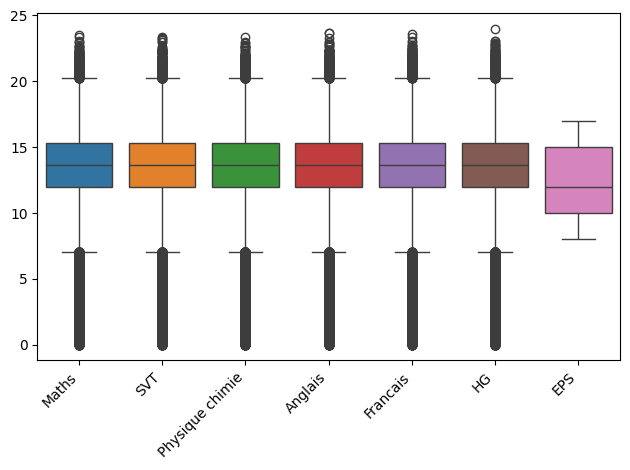

In [11]:
sns.boxplot(data=base)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

Le boxplot précédent montre la présence des outliers dans les colonnes "Maths", "SVT", "Physique Chimie", "Anglais", "Français", "HG", "EPS".

In [12]:
base.describe().T

,count,mean,min,25%,50%,75%,max,std
Date de Naissance,340000,2004-01-01 20:41:48.818823424,2000-01-01 00:00:00,2002-01-01 00:00:00,2004-01-03 00:00:00,2006-01-01 00:00:00,2008-01-01 00:00:00,NaN
Maths,340000.0,13.405545,0.002835,11.986848,13.662263,15.2927,23.515122,3.012036
SVT,340000.0,13.401782,0.000177,11.98233,13.655323,15.283014,23.388302,3.015257
Physique chimie,340000.0,13.398444,0.000326,11.985059,13.655604,15.277264,23.380124,3.012253
Anglais,340000.0,13.405935,0.000669,11.986885,13.665931,15.285064,23.65572,3.015305
Francais,340000.0,13.408487,0.001472,11.981011,13.671599,15.293965,23.605553,3.022185
HG,340000.0,13.403542,0.000386,11.989494,13.663098,15.28456,23.989277,3.016249
EPS,340000.0,12.494168,8.0,10.0,12.0,15.0,17.0,2.871058


Après voir fait le résumé statistique de la base, nous nous rendons compte que le maximum par matière est superieur à 20,0 ce qui ne peut normalement pas être le cas étant donné que le calcul de la moyenne se fait sur 20.
Vu le contexte métier dans lequel nous nous trouvons il est raisonnable de s'assurer que toutes les notes ne dépassent pas 20

In [13]:
def corriger_note(note):
    try:
        note = float(note)
        if note < 0:
            return 0
        elif note > 20:
            return 20
        else:
            return note
    except:
        return np.nan  # Si la note n'est pas un nombre valide

colonnes_notes = ['Maths', 'SVT', 'Physique chimie', 'Francais', 'Anglais', 'HG', 'EPS']  
for colonne in colonnes_notes:
    base[colonne] = base[colonne].apply(corriger_note)


print("Valeurs minimales et maximales après correction:")
print(base[colonnes_notes].agg(['min', 'max']))

Valeurs minimales et maximales après correction:
         Maths        SVT  Physique chimie   Francais    Anglais         HG  \
min   0.002835   0.000177         0.000326   0.001472   0.000669   0.000386   
max  20.000000  20.000000        20.000000  20.000000  20.000000  20.000000   

      EPS  
min   8.0  
max  17.0  


Calcul de la moyenne pour chaque candidat

In [14]:
coeffs_C = {'Maths': 5, 'Physique chimie': 5, 'SVT': 4, 'Anglais': 3, 'Francais': 3, 'HG': 3, 'EPS': 2}
coeffs_D = {'Maths': 4, 'Physique chimie': 5, 'SVT': 5, 'Anglais': 3, 'Francais': 3, 'HG': 3, 'EPS': 2}

def calculer_moyenne_ponderee(row):
    if row['Serie'] == 'C':
        coeffs = coeffs_C
    elif row['Serie'] == 'D':
        coeffs = coeffs_D
    else:
        return np.nan  # Autres séries non prises en compte

    somme_notes_ponderees = sum(row[matiere] * coeffs[matiere] for matiere in coeffs)
    somme_coeffs = sum(coeffs.values())
    
    return round(somme_notes_ponderees / somme_coeffs, 2)

# Application de la fonction à chaque ligne
base['Moyenne'] = base.apply(calculer_moyenne_ponderee, axis=1)


# Construire une colonne Rang pour classer les candidats par ordre décroissant des performances (1er, 2e …).

In [15]:
base['Rang_num'] = base['Moyenne'].rank(method='min', ascending=False).astype(int)

# Fonction pour convertir un entier en rang lisible avec accord du genre
def format_rang(row):
    n = row['Rang_num']
    sexe = row['Sexe']
    
    if n == 1:
        return "1ère" if sexe == 'F' else "1er"
    else:
        return f"{n}e"

base['Rang'] = base.apply(format_rang, axis=1)

base = base.sort_values(by='Rang_num').reset_index(drop=True)

base.drop(columns=['Rang_num'], inplace=True)

In [16]:
base.head()

,Matricule,Sexe,Date de Naissance,Type établissement,Serie,Département,Maths,SVT,Physique chimie,Anglais,Francais,HG,EPS,Moyenne,Rang
0,MAT339344,F,2000-10-13,Privé,D,Brazza,17.283209,19.349436,20.000000,16.845133,18.724586,17.886561,15.0,18.25,1ère
1,MAT320575,F,2004-12-13,Public,D,Brazza,17.178923,18.953593,18.823152,18.154065,15.763528,20.000000,15.0,17.97,2e
2,MAT080703,F,2002-05-24,Public,D,PN,19.121938,16.552689,19.971794,18.849592,17.377930,17.841617,14.0,17.97,2e
3,MAT097579,F,2001-09-26,Public,D,Niari,17.878294,17.367577,20.000000,19.209423,14.403750,18.486541,17.0,17.95,4e
4,MAT138522,F,2004-03-12,Public,D,PN,18.292436,20.000000,16.089794,17.750075,17.773196,17.350863,17.0,17.85,5e


# Construire une colonne Décision du jury qui permet de dire si l’élève est admis ou échoué.


In [17]:
base['Décision du jury'] = base['Moyenne'].apply(lambda x: 'Admis' if x >= 10 else 'Échoué')

# Créer un data frame BAC_Admis ne contenant que les candidats admis. 

In [18]:
BAC_Admis = base[base['Décision du jury'] == 'Admis'].copy()

# Construire une colonne Mention qui permet de calculer les mentions des élèves admis 


In [19]:
def attribuer_mention(moyenne):
    if moyenne >= 17:
        return "Excellent"
    elif moyenne >= 16:
        return "Très bien"
    elif moyenne >= 14:
        return "Bien"
    elif moyenne >= 12:
        return "Assez-bien"
    elif moyenne >= 10:
        return "Passable"
    else:
        return "Non admis"  

# Application aux élèves admis uniquement
BAC_Admis['Mention'] = BAC_Admis['Moyenne'].apply(attribuer_mention)


In [20]:
BAC_Admis['Mention'].unique()

array(['Excellent', 'Très bien', 'Bien', 'Assez-bien', 'Passable'],
      dtype=object)

# Statistiques sociodémographiques
# Pourcentage par sexe : Pourcentage des hommes et des femmes inscrits à l’issus de cette session.

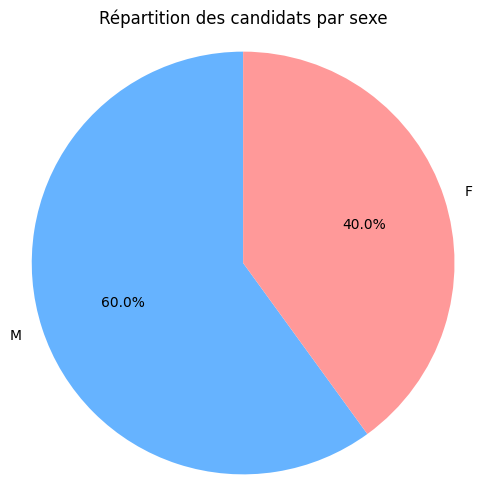

In [21]:
repartition_sexe = base['Sexe'].value_counts(normalize=True) * 100
repartition_sexe = repartition_sexe.round(0)

# Camembert
plt.figure(figsize=(6, 6))
plt.pie(repartition_sexe, labels=repartition_sexe.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Répartition des candidats par sexe")
plt.axis('equal')  
plt.show()

# Pourcentage des candidats par département : Pourcentage des candidats inscrits par département.

In [22]:
round(base['Département'].value_counts(normalize=True)*100,1)

Département
Brazza           30.0
PN               25.0
Pool             20.6
Niari            20.0
Sangha            0.6
Bouenza           0.6
Likouala          0.6
Lekoumou          0.6
Plateaux          0.6
Cuvette Ouest     0.6
Cuvette           0.6
Name: proportion, dtype: float64

Visualisation du pourcentage des candidats par département

C:\Users\Laurian Juste A. N\AppData\Local\Temp\ipykernel_7448\445734647.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=departement_pct, x='Pourcentage', y='Département', palette='Blues_d')


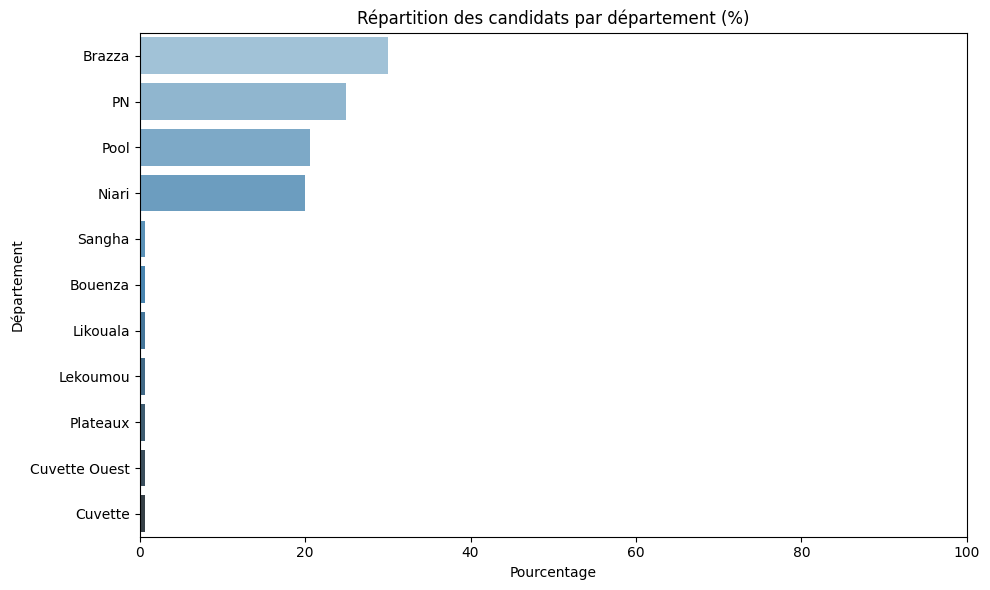

In [23]:
departement_pct = base['Département'].value_counts(normalize=True).mul(100).round(1).reset_index()
departement_pct.columns = ['Département', 'Pourcentage']


# Affichage du barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=departement_pct, x='Pourcentage', y='Département', palette='Blues_d')
plt.title("Répartition des candidats par département (%)")
plt.xlabel("Pourcentage")
plt.ylabel("Département")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

# Pourcentage par type d’établissement : Il s’agit ici de présenter le pourcentage des candidats en fonction de l’établissement fréquenté (Privé, Publique ou Candidat libre).

In [24]:
round(base['Type établissement'].value_counts(normalize=True)*100)


Type établissement
Public            50.0
Privé             40.0
Candidat Libre    10.0
Name: proportion, dtype: float64

Visualisation du pourcentage des candidats par type d'établissement

C:\Users\Laurian Juste A. N\AppData\Local\Temp\ipykernel_7448\2604254794.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=etablissement_pct, x='Pourcentage', y='Type', palette='Set2')


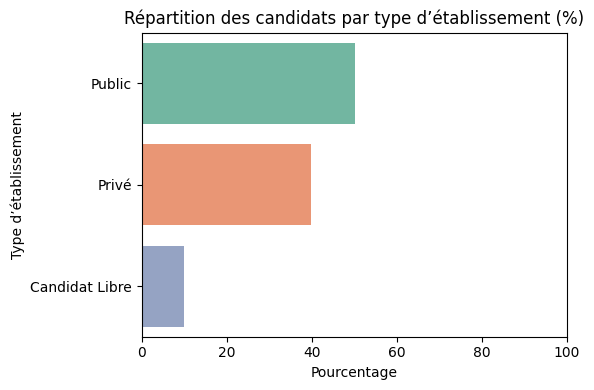

In [25]:
etablissement_pct = base['Type établissement'].value_counts(normalize=True).mul(100).round(1).reset_index()
etablissement_pct.columns = ['Type', 'Pourcentage']

# Barplot
plt.figure(figsize=(6, 4))
sns.barplot(data=etablissement_pct, x='Pourcentage', y='Type', palette='Set2')
plt.title("Répartition des candidats par type d’établissement (%)")
plt.xlabel("Pourcentage")
plt.ylabel("Type d’établissement")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

# 

# Pourcentage par tranche d’âge

In [51]:
base['Date de Naissance'] = pd.to_datetime(base['Date de Naissance'])
base['Age'] = datetime.now().year - base['Date de Naissance'].dt.year

def tranche_age(age):
    if age < 18:
        return 'Moins de 18 ans'
    elif 18 <= age < 20:
        return 'Entre 18 et 20 ans'
    elif 20 <= age < 22:
        return 'Entre 20 et 22 ans'
    else:
        return 'Plus de 22 ans'

base['Tranche d\'âge'] = base['Age'].apply(tranche_age)


crosstab_result = pd.crosstab(index=base["Tranche d'âge"], columns="Effectif")


crosstab_result["Pourcentage (%)"] = round((crosstab_result["Effectif"] / crosstab_result["Effectif"].sum()) * 100, 2)


print(crosstab_result)


col_0               Effectif  Pourcentage (%)
Tranche d'âge                                
Entre 18 et 20 ans     84912            24.97
Entre 20 et 22 ans     85354            25.10
Moins de 18 ans          115             0.03
Plus de 22 ans        169619            49.89


Visualisation du pourcentage des candidats par tranches d'âge

C:\Users\Laurian Juste A. N\AppData\Local\Temp\ipykernel_7448\3612576470.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crosstab_result_reset, x="Tranche d'âge", y="Pourcentage (%)", palette="coolwarm")


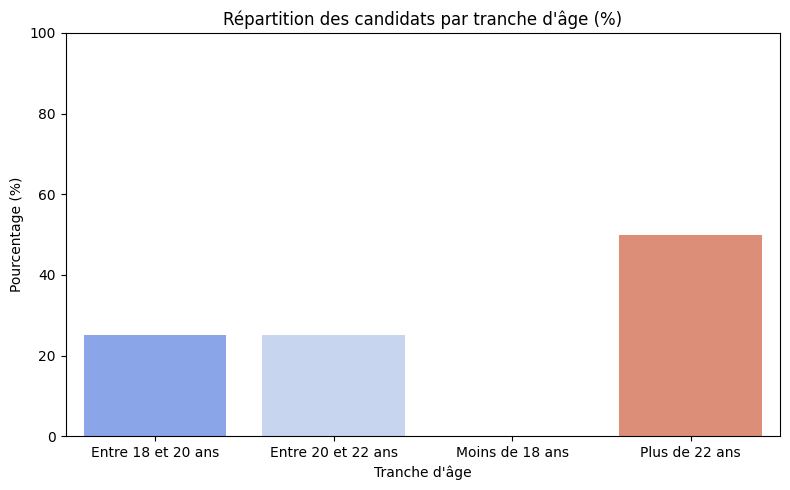

In [27]:
# Réinitialiser l'index pour utiliser les tranches en axe X
crosstab_result_reset = crosstab_result.reset_index()

# Barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=crosstab_result_reset, x="Tranche d'âge", y="Pourcentage (%)", palette="coolwarm")
plt.title("Répartition des candidats par tranche d'âge (%)")
plt.xlabel("Tranche d'âge")
plt.ylabel("Pourcentage (%)")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Age  min, âge  max, âge  moyen

In [28]:
age_min = base['Age'].min()
age_max = base['Age'].max()
age_moyen = round(base['Age'].mean(), 0)
print(f"Âge minimum : {age_min} ans")
print(f"Âge maximum : {age_max} ans")
print(f"Âge moyen   : {age_moyen} ans")


Âge minimum : 17 ans
Âge maximum : 25 ans
Âge moyen   : 21.0 ans


# Tableaux de contingences

# Répartition des candidats par sexe et par série

In [29]:
pd.crosstab(base["Sexe"],base["Serie"],margins=True,margins_name="Total")

Serie,C,D,Total
Sexe,,,
F,40666,95071,135737
M,61577,142686,204263
Total,102243,237757,340000


Visualisation des candidats par sexe et par série

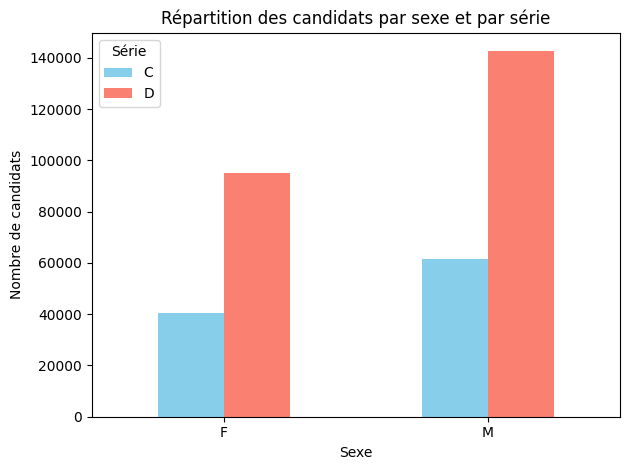

In [30]:
table = pd.crosstab(base["Sexe"], base["Serie"])

# Création du graphique
table.plot(kind="bar", stacked=False, color=["skyblue", "salmon"])

plt.title("Répartition des candidats par sexe et par série")
plt.xlabel("Sexe")
plt.ylabel("Nombre de candidats")
plt.legend(title="Série")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Répartition des candidats par sexe et par type d’établissement

In [31]:
pd.crosstab(base["Sexe"],base["Type établissement"],margins=True,margins_name="Total")

Type établissement,Candidat Libre,Privé,Public,Total
Sexe,,,,
F,13585,54113,68039,135737
M,20361,81424,102478,204263
Total,33946,135537,170517,340000


Visualisation des candidats par sexe et type d'établissement

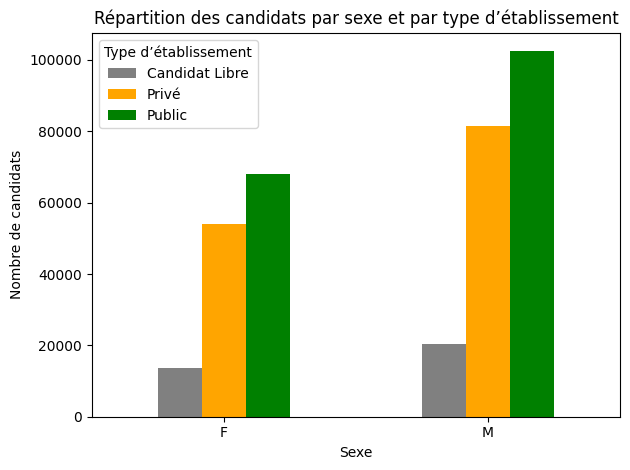

In [32]:
table_etab = pd.crosstab(base["Sexe"], base["Type établissement"])

# Graphique
table_etab.plot(kind="bar", stacked=False, color=["gray", "orange", "green"])

plt.title("Répartition des candidats par sexe et par type d’établissement")
plt.xlabel("Sexe")
plt.ylabel("Nombre de candidats")
plt.legend(title="Type d’établissement")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Répartition des candidats par sexe et par département

In [33]:
pd.crosstab(base["Sexe"],base["Département"],margins=True,margins_name="Total")


Département,Bouenza,Brazza,Cuvette,Cuvette Ouest,Lekoumou,Likouala,Niari,PN,Plateaux,Pool,Sangha,Total
Sexe,,,,,,,,,,,,
F,853,40948,847,811,848,844,27086,33794,840,28001,865,135737
M,1291,61052,1231,1269,1275,1288,40914,51206,1255,42164,1318,204263
Total,2144,102000,2078,2080,2123,2132,68000,85000,2095,70165,2183,340000


Visualisation des candidats par sexe et par département

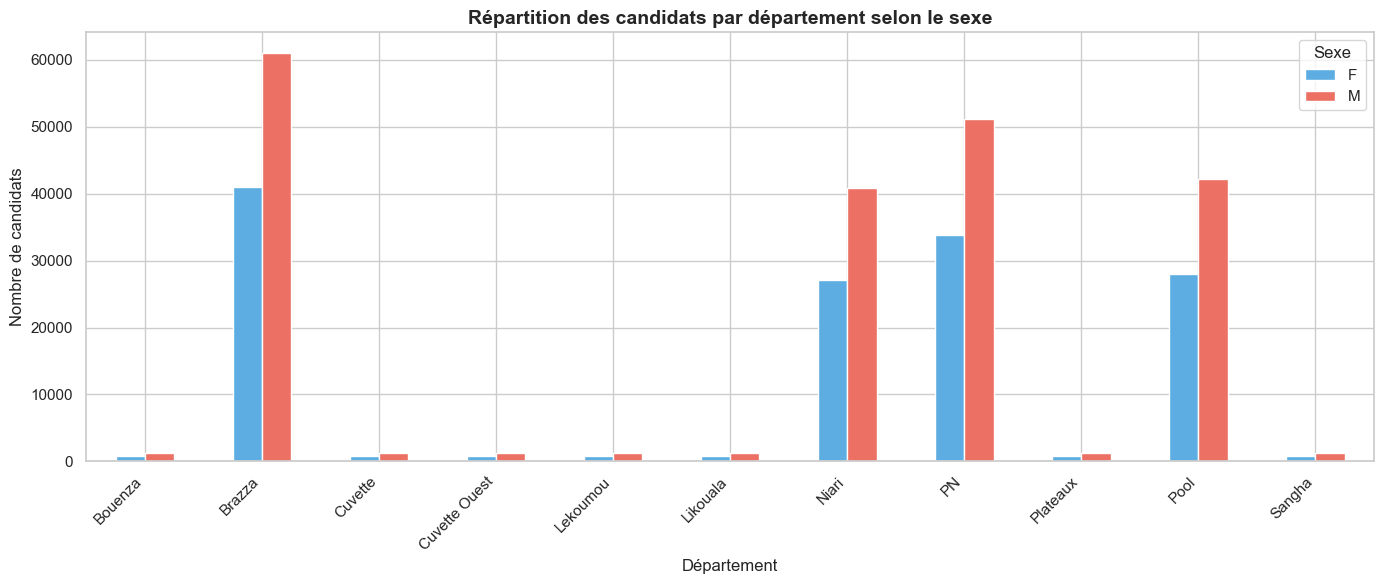

In [34]:
sns.set(style="whitegrid")

table_dept = pd.crosstab(base["Sexe"], base["Département"])

# Création du graphique
ax = table_dept.T.plot(kind="bar", figsize=(14, 6), color=["#5DADE2", "#EC7063"])

plt.title("Répartition des candidats par département selon le sexe", fontsize=14, weight='bold')
plt.xlabel("Département", fontsize=12)
plt.ylabel("Nombre de candidats", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sexe")
plt.tight_layout()
plt.show()


# Répartition des candidats par département et par série

In [35]:
pd.crosstab(base["Département"],base["Serie"],margins=True,margins_name="Total")


Serie,C,D,Total
Département,,,
Bouenza,673,1471,2144
Brazza,30776,71224,102000
Cuvette,651,1427,2078
Cuvette Ouest,628,1452,2080
Lekoumou,606,1517,2123
Likouala,642,1490,2132
Niari,20470,47530,68000
PN,25619,59381,85000
Plateaux,611,1484,2095


Visualisation des candidats par département et par série

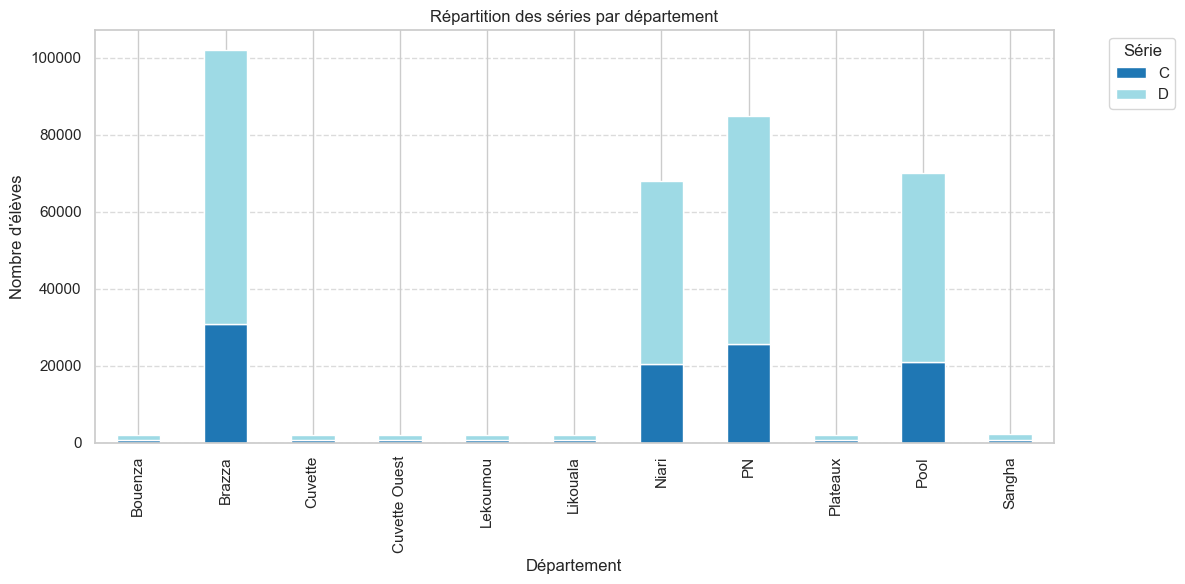

In [36]:
ct = pd.crosstab(base["Département"], base["Serie"])
ct.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")

plt.title("Répartition des séries par département")
plt.xlabel("Département")
plt.ylabel("Nombre d'élèves")
plt.legend(title="Série", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Répartition des candidats par sexe et par tranche d’âge

In [37]:
pd.crosstab(base["Sexe"],base["Tranche d'âge"],margins=True,margins_name="Total")


Tranche d'âge,Entre 18 et 20 ans,Entre 20 et 22 ans,Moins de 18 ans,Plus de 22 ans,Total
Sexe,,,,,
F,33976,34191,53,67517,135737
M,50936,51163,62,102102,204263
Total,84912,85354,115,169619,340000


Visualisation des candidats par sexe et par tranche d'âge 

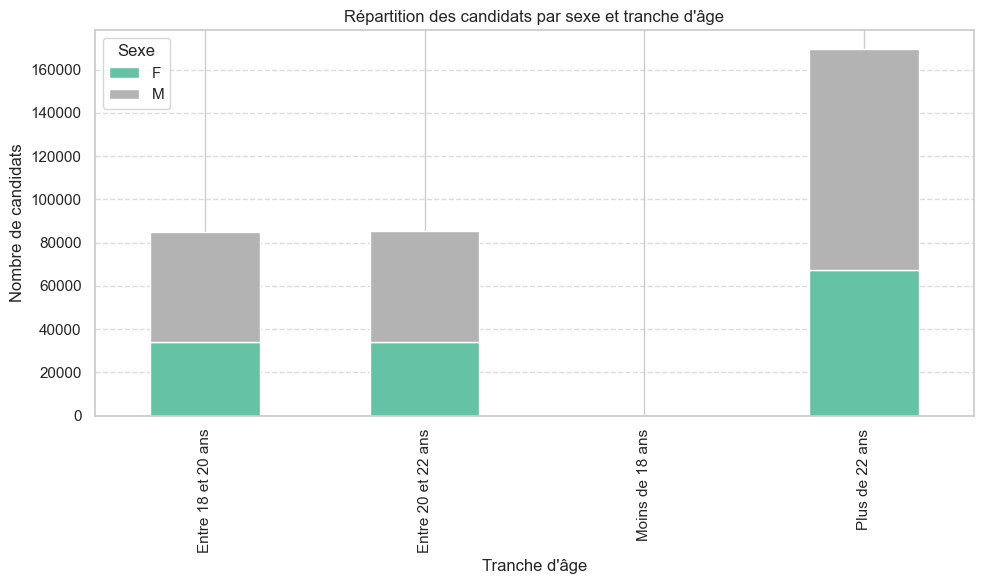

In [38]:
cp = pd.crosstab(base["Sexe"], base["Tranche d'âge"])

cp.T.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set2")

plt.title("Répartition des candidats par sexe et tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Nombre de candidats")
plt.legend(title="Sexe")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Taux de réussite

# Taux de réussite global

In [39]:
total = base.shape[0]

nb_admis = (base['Décision du jury'] == 'Admis').sum()

nb_echoues = total - nb_admis

taux_reussite = round((nb_admis / total) * 100, 2)
taux_echec = round((nb_echoues / total) * 100, 2)

print(f"Taux de réussite : {taux_reussite}%")
print(f"Taux d’échec    : {taux_echec}%")

Taux de réussite : 95.13%
Taux d’échec    : 4.87%


# Taux de réussite par sexe

In [40]:
table = pd.crosstab(base['Sexe'], base['Décision du jury'])

taux_reussite_par_sexe = round((table['Admis'] / table.sum(axis=1)) * 100, 2)

print("Taux de réussite par sexe :")
for sexe, taux in taux_reussite_par_sexe.items():
    print(f" {sexe} : {taux}%")

Taux de réussite par sexe :
 F : 95.37%
 M : 94.97%


# Taux de réussite par filière

In [41]:
table_serie_jury = pd.crosstab(base['Serie'], base['Décision du jury'])

taux_reussite_par_serie = round((table_serie_jury['Admis'] / table_serie_jury.sum(axis=1)) * 100, 2)

print("Taux de réussite par série :")
for serie, taux in taux_reussite_par_serie.items():
    print(f" Série {serie} : {taux}%")

Taux de réussite par série :
 Série C : 95.18%
 Série D : 95.1%


# Taux de réussite par département

In [42]:
table_departement = pd.crosstab(base['Département'], base['Décision du jury'])

taux_reussite_departement = round((table_departement['Admis'] / table_departement.sum(axis=1)) * 100, 2)

print("Taux de réussite par département :")
for dep, taux in taux_reussite_departement.items():
    print(f" {dep} : {taux}%")


Taux de réussite par département :
 Bouenza : 94.64%
 Brazza : 95.03%
 Cuvette : 95.28%
 Cuvette Ouest : 95.14%
 Lekoumou : 94.21%
 Likouala : 95.08%
 Niari : 95.15%
 PN : 95.18%
 Plateaux : 95.51%
 Pool : 95.22%
 Sangha : 95.14%


# Statistiques relatives aux moyennes

# Moyenne du min et du max par série

In [43]:
min_max_par_serie = base.groupby('Serie')['Moyenne'].agg(['min', 'max']).reset_index()
print("Moyenne minimale et maximale par série :")
print(min_max_par_serie)


Moyenne minimale et maximale par série :
  Serie   min    max
0     C  2.72  17.67
1     D  2.60  18.25


# Moyenne min et max par département

In [44]:
min_max_serie_dept = base.groupby(['Serie', 'Département'])['Moyenne'].agg(['min', 'max']).reset_index()
print("Moyenne minimale et maximale par série et par département :")
print(min_max_serie_dept)


Moyenne minimale et maximale par série et par département :
   Serie    Département   min    max
0      C        Bouenza  6.26  16.92
1      C         Brazza  3.76  17.64
2      C        Cuvette  6.44  16.74
3      C  Cuvette Ouest  5.48  17.28
4      C       Lekoumou  4.77  16.76
5      C       Likouala  4.62  17.04
6      C          Niari  2.72  17.37
7      C             PN  2.83  17.61
8      C       Plateaux  4.46  16.68
9      C           Pool  4.11  17.67
10     C         Sangha  5.99  17.00
11     D        Bouenza  4.58  17.24
12     D         Brazza  3.08  18.25
13     D        Cuvette  3.17  17.05
14     D  Cuvette Ouest  4.33  17.22
15     D       Lekoumou  5.19  17.27
16     D       Likouala  4.34  17.00
17     D          Niari  3.01  17.95
18     D             PN  2.93  17.97
19     D       Plateaux  4.46  17.21
20     D           Pool  2.60  17.81
21     D         Sangha  3.84  17.17


# Top 10 des meilleurs et des pires moyennes

In [45]:
colonnes_infos = ['Matricule', 'Sexe', 'Département', 'Serie', 'Moyenne']

top10_meilleurs = base.sort_values(by='Moyenne', ascending=False).head(10)[colonnes_infos]
print("Top 10 des meilleurs candidats :")
print(top10_meilleurs)

top10_pires = base.sort_values(by='Moyenne', ascending=True).head(10)[colonnes_infos]
print("\nTop 10 des moins bons candidats :")
print(top10_pires)


Top 10 des meilleurs candidats :
   Matricule Sexe Département Serie  Moyenne
0  MAT339344    F      Brazza     D    18.25
1  MAT320575    F      Brazza     D    17.97
2  MAT080703    F          PN     D    17.97
3  MAT097579    F       Niari     D    17.95
4  MAT138522    F          PN     D    17.85
6  MAT288758    F        Pool     D    17.81
5  MAT127047    F       Niari     D    17.81
7  MAT231335    F        Pool     D    17.80
8  MAT335052    F        Pool     D    17.80
9  MAT196292    F      Brazza     D    17.77

Top 10 des moins bons candidats :
        Matricule Sexe Département Serie  Moyenne
339999  MAT008098    F        Pool     D     2.60
339998  MAT064755    M       Niari     C     2.72
339997  MAT244354    M          PN     C     2.83
339996  MAT323483    F          PN     D     2.93
339995  MAT140411    M       Niari     D     3.01
339994  MAT327142    M      Brazza     D     3.08
339993  MAT197558    M       Niari     D     3.12
339992  MAT199564    M        Pool   

# Volet n°2 : Inférence statistique

# Construire le graphique qui permet de visualiser les moyennes par département

C:\Users\Laurian Juste A. N\AppData\Local\Temp\ipykernel_7448\3709851836.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=moyennes_par_dept, x='Département', y='Moyenne', palette='viridis')


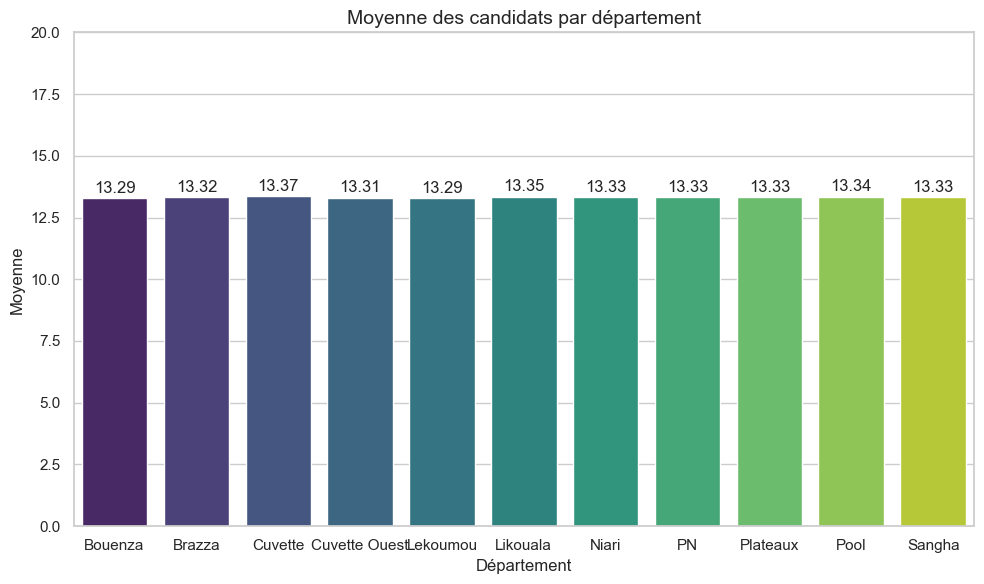

In [46]:
moyennes_par_dept = base.groupby('Département')['Moyenne'].mean().round(2).reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(data=moyennes_par_dept, x='Département', y='Moyenne', palette='viridis')

plt.title("Moyenne des candidats par département", fontsize=14)
plt.ylabel("Moyenne", fontsize=12)
plt.xlabel("Département", fontsize=12)

for index, row in moyennes_par_dept.iterrows():
    plt.text(index, row['Moyenne'] + 0.1, str(row['Moyenne']), ha='center', va='bottom')

plt.ylim(0, 20)  # Pour respecter l'échelle des notes
plt.tight_layout()
plt.show()



# Que vous inspire ce graphique ? 

Le graphique montre que la moyenne des candidats est globalement homogène entre les départements, variant légèrement entre 13.29 et 13.37. Le département avec la meilleure moyenne est la Cuvette (13.37), tandis que Bouénza et Lekoumou ont les moyennes les plus faibles (13.29). Les écarts sont minimes, indiquant peu de disparités régionales en termes de performance moyenne.

# Quel test permet de répondre à cette problématique ?

Le test de l'ANOVA

# Formuler  les  hypothèses  du  test  et  vérifier  si  les  conditions  d’application  de  ce  test  sont 
# vérifiées.

Ho: Le département n'a pas d'influence sur la moyenne de l'étudiant
H1: Le département a une influence sur la moyenne de l'étudiant

# Conditions d'application de l'ANOVA


1) Normalité des données: Pour ce faire nous allons faire le test de Jarque-Bera adoptés à la taille et au volume de nos données.
Hypothèses:
H0 : les données suivent une loi normale
H1 : les données ne suivent pas un loi normale



 Analyse de la variable : Maths
 Jarque-Bera : p-value = 0.0000
Les données ne suivent pas une loi normale.


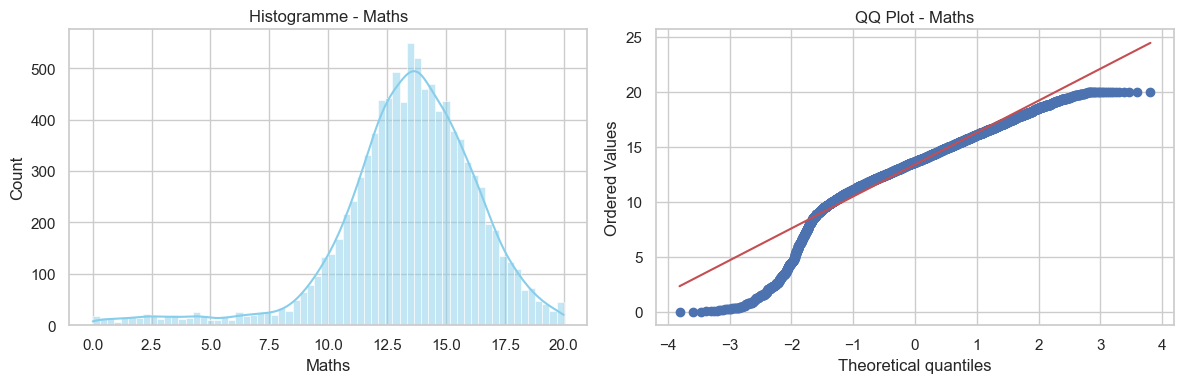


 Analyse de la variable : SVT
 Jarque-Bera : p-value = 0.0000
Les données ne suivent pas une loi normale.


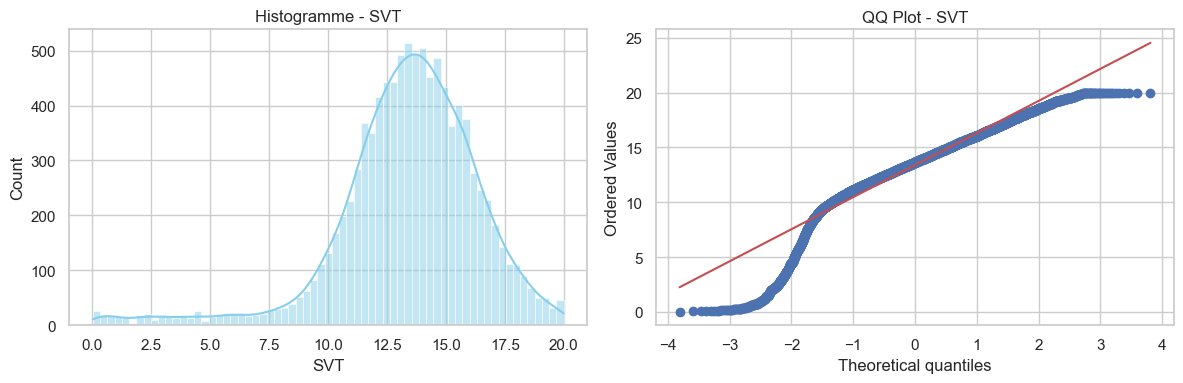


 Analyse de la variable : Physique chimie
 Jarque-Bera : p-value = 0.0000
Les données ne suivent pas une loi normale.


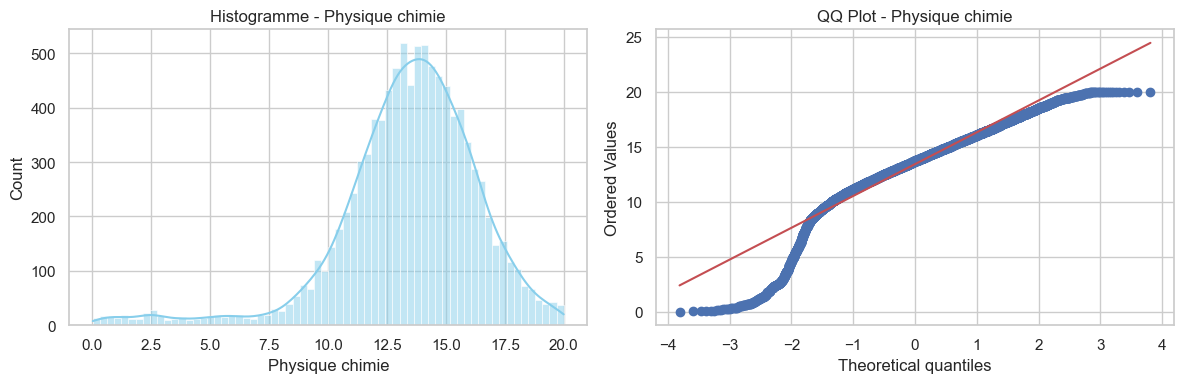


 Analyse de la variable : Anglais
 Jarque-Bera : p-value = 0.0000
Les données ne suivent pas une loi normale.


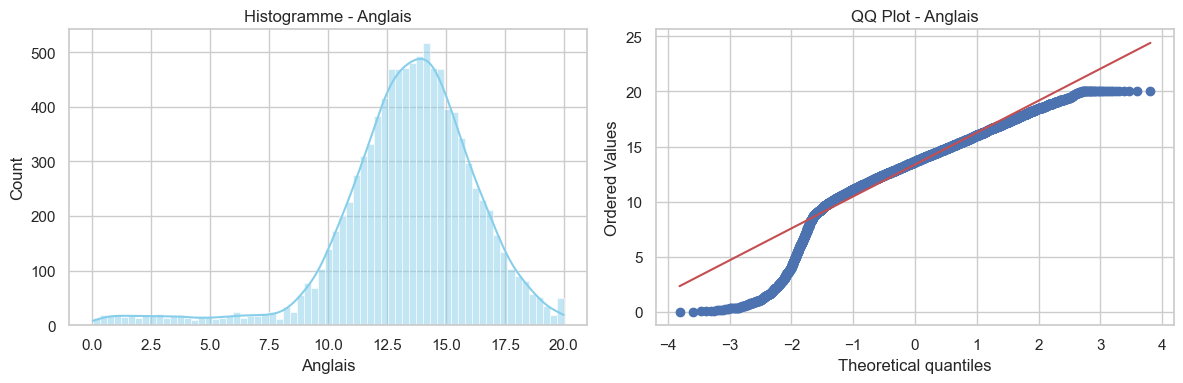


 Analyse de la variable : Francais
 Jarque-Bera : p-value = 0.0000
Les données ne suivent pas une loi normale.


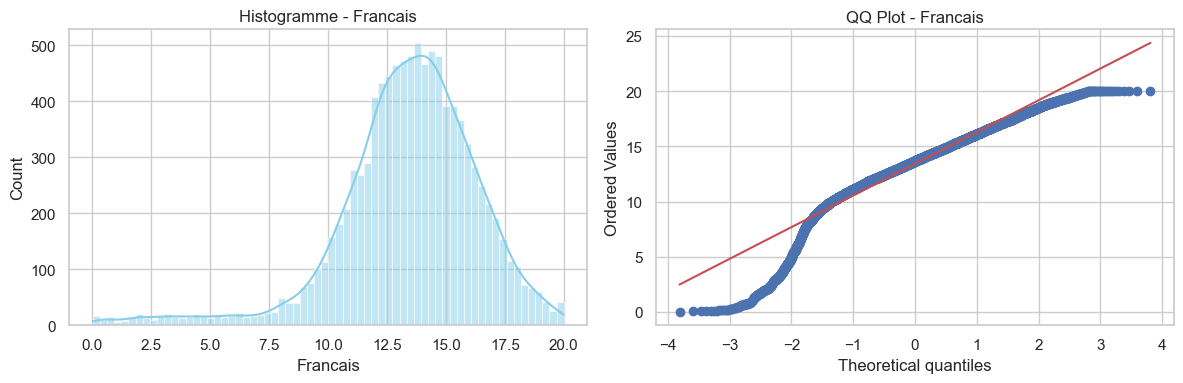


 Analyse de la variable : HG
 Jarque-Bera : p-value = 0.0000
Les données ne suivent pas une loi normale.


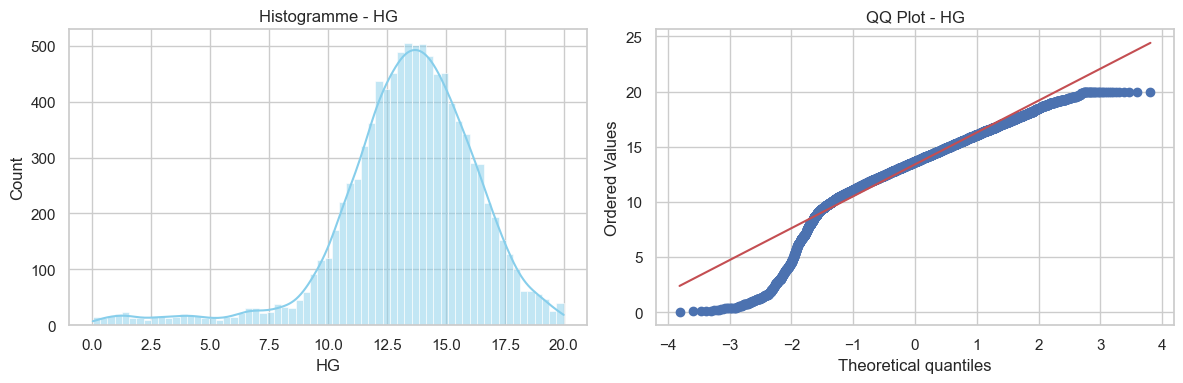


 Analyse de la variable : EPS
 Jarque-Bera : p-value = 0.0000
Les données ne suivent pas une loi normale.


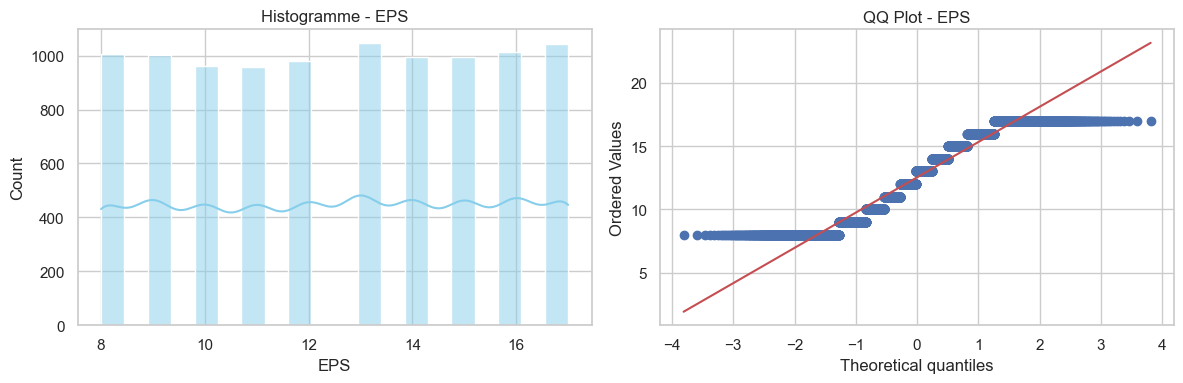

In [47]:
variables_numeriques = ["Maths", "SVT", "Physique chimie", "Anglais", "Francais", "HG", "EPS"]

for col in variables_numeriques:
    print(f"\n Analyse de la variable : {col}")
    
    data = base[col].dropna()
    
    # Échantillonnage si très gros volume
    if len(data) > 10000:
        data = data.sample(10000, random_state=42)
    
    stat_jb, p_jb = jarque_bera(data)
    
    
    print(f" Jarque-Bera : p-value = {p_jb:.4f}")

    
    if p_jb > 0.05 and p_ks > 0.05:
        print(" Les données semblent suivre une loi normale.")
    else:
        print("Les données ne suivent pas une loi normale.")
    
    # Visualisation
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(data, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Histogramme - {col}")
    
    # QQ plot
    probplot(data, dist="norm", plot=axes[1])
    axes[1].set_title(f"QQ Plot - {col}")
    
    plt.tight_layout()
    plt.show()


2) Homogénéité des variances: Pour ce faire nous faisons le test de Levene pour voir si l'homogénéité des variances est vérifiée.
Hypothèses:
H0: Les variances des moyennes sont égales entre les départements.
H1: Au moins un département a une variance différente.

In [48]:
base_filtrée = base[['Département', 'Moyenne']].dropna()

groupes = base_filtrée.groupby('Département')['Moyenne'].apply(list)

# Test de Levene (homoscédasticité)
stat, p_value = levene(*groupes)

print(f"Test de Levene : p-value = {p_value:.4f}")

if p_value > 0.05:
    print("Homogénéité des variances vérifiée : les variances des moyennes sont égales entre départements.")
else:
    print("Homogénéité des variances non vérifiée : les variances des moyennes diffèrent selon les départements.")


Test de Levene : p-value = 0.3790
Homogénéité des variances vérifiée : les variances des moyennes sont égales entre départements.


Etant donné que les données ne suivent pas une loi normale et que l'homogénéité des variances a été vérifiée, alors on ne peut pas faire le test de l'ANOVA pour voir si le département influence la moyenne de l'étudiant.
Mais par conséquent nous pouvons avoir une approche non paramétrique en faisant le test de Kruskal-Wallis.

In [53]:
# Regrouper les moyennes par département
groupes = [g['Moyenne'].values for nom, g in base.groupby('Département')]

# Appliquer le test de Kruskal-Wallis
stat, p_value = kruskal(*groupes)

# Afficher les résultats
print(f"Statistique H = {stat:.4f}")
print(f"p-valeur = {p_value:.4f}")

# Interprétation
if p_value < 0.05:
    print("→ Il existe une différence significative entre au moins deux départements.")
else:
    print("→ Aucune différence significative entre les départements.")


Statistique H = 5.6327
p-valeur = 0.8451
→ Aucune différence significative entre les départements.


# Reprendre la même question pour évaluer l’influence du sexe sur la performance du candidat.

# Construire le graphique qui permet de visualiser les moyennes par sexe

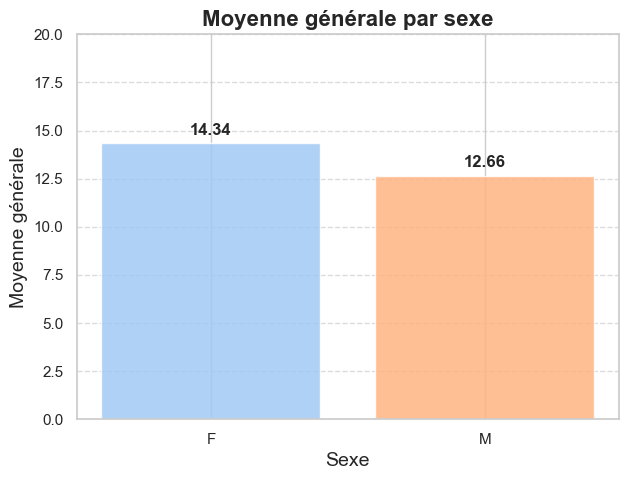

In [57]:
# Calcul des moyennes par sexe
moyennes_par_sexe = base.groupby('Sexe')['Moyenne'].mean()

# Style seaborn
sns.set(style="whitegrid")

# Taille figure
plt.figure(figsize=(7,5))

# Palette de couleurs harmonieuse
colors = sns.color_palette("pastel", n_colors=len(moyennes_par_sexe))

# Barplot
bars = plt.bar(moyennes_par_sexe.index, moyennes_par_sexe.values, color=colors, alpha=0.85)

# Ajouter titre et labels
plt.title('Moyenne générale par sexe', fontsize=16, fontweight='bold')
plt.xlabel('Sexe', fontsize=14)
plt.ylabel('Moyenne générale', fontsize=14)
plt.ylim(0, 20)

# Ajouter valeurs au-dessus des barres
for bar in bars:
    hauteur = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, hauteur + 0.3, 
             f'{hauteur:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Grille légère sur y
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


A présent il est question de savoir si le sexe a une influence sur la moyenne du candidat. Vu que le test de Jacques Bera nous a permis de dire que les données ne suivent pas une loi normale. Vérifions maintenant l'homoscédasticité entre le sexe et la moyenne.

In [49]:
base_filtrée = base[['Sexe', 'Moyenne']].dropna()

groupes = base_filtrée.groupby('Sexe')['Moyenne'].apply(list)

# Test de Levene (homoscédasticité)
stat, p_value = levene(*groupes)

print(f"Test de Levene : p-value = {p_value:.4f}")

if p_value > 0.05:
    print("Homogénéité des variances vérifiée : les variances des moyennes sont égales entre sexes.")
else:
    print("Homogénéité des variances non vérifiée : les variances des moyennes diffèrent selon les sexes.")


Test de Levene : p-value = 0.0000
Homogénéité des variances non vérifiée : les variances des moyennes diffèrent selon les sexes.


Vu que les données ne suivent pas une loi normale et que l'homogénéité des variances entre le sexe et la moyenne n'est vérifiée pas, alors nous ne pouvons pas faire le test d'analyse de la variance (ANOVA) pour voir si le sexe a un impact les performances du candidat au baccalauréat général de cette session 2025.

Alternative au test de l'ANOVA (test de Mann-Whitney-Wilcoxon)

In [64]:
from scipy.stats import mannwhitneyu

# Séparer les moyennes selon le sexe
femmes = base[base['Sexe'] == 'F']['Moyenne']
hommes = base[base['Sexe'] == 'M']['Moyenne']

# Effectuer le test de Mann-Whitney
stat, p = mannwhitneyu(femmes, hommes, alternative='two-sided')

# Afficher les résultats
print(f"Statistique U = {stat:.4f}")
print(f"p-valeur = {p:.4f}")
if p < 0.05:
    print("→ Il existe une différence significative entre les moyennes des femmes et des hommes.")
else:
    print("→ Aucune différence significative entre les moyennes des femmes et des hommes.")



Statistique U = 24190671274.0000
p-valeur = 0.0000
→ Il existe une différence significative entre les moyennes des femmes et des hommes.
